In [91]:
def ASZ1(RS, ES, WZ, SM, RCH, CAP, DEF, WMAX, KU, KL, ZCAP):
        #EA,RS,ES,WZB,SMSB,SMSE,RCH,CAP,DEF,WMAX,KU,KL,ZCAP,Q1,ESUM
        Q1 = 0
        CAP = 0
        RCH = 0
        
        if  ( ES > 0 ) : #ja no sniega bijusi iztvaikošana, no augsnes tipa neiztvaiko. Okk...
            #
            EA = 0
            
        else:
            if  ( SM >= WMAX ) :    #ja soil moisture ir vairāk nekā augsnē varētu būt, tad aprēķina iztvaikošanu pēc augšējās robežas
                                    #ja starpība negatīva, tas nozīmē, ka augsnē mitrums nav tik daudz kā tur varētu būt. 
                EA = KU * DEF
            else:
                if  ( SM == 0 and WZ >= ZCAP ) : #ja augsnes mitrums ir 0 un ūdenslīmenis ir lielāks par 
                    EA = KL * DEF

                
                if  ( WZ > ZCAP ) : # ja ūdenslīmenis ir virs 
                    EA = DEF *  ( KU -  ( KU - KL )  *  ( 1 - SM / WMAX ) )
                else:
                    EA = DEF *  ( KU - WZ *  ( KU - KL )  *  ( 1 - SM / WMAX )  / ZCAP )
        


        if  ( SM < 0 ) : #ja sarēķinātais mitrums augsnē ir negatīvs, tad tas nozīmē, ka tas ir aizgājis prom no augsnes, CAP, iztvaikojis?
            CAP = - SM
            
        SM = SM + RS - EA + CAP
        DSMSEWMAX = SM - WMAX
        
        if  ( SM > WMAX ) :
            RCH = SM - WMAX #tā ūdens daļa, kas ir vairāk nekā ietilpst augsnē, aiziet uz RCH. 
            Q1 = 0.02 * RCH
            RCH = 0.98 * RCH
            SM = SM + RS - EA - RCH - Q1 + CAP

             
        D=dict(EA=EA,RS=RS,ES=ES,WZ=WZ,SM=SM,RCH=RCH,CAP=CAP,DEF=DEF,WMAX=WMAX,KU=KU,KL=KL,ZCAP=ZCAP,Q1=Q1)
        return D

In [103]:
RS=0 #šitik pienāk klāt
ES=0 #šitik iztvaiko no sniega (sniegs ir/nav) 

SM=10 #
RCH=0
CAP=10
DEF=10

WMAX=80

ZCAP=320
WZ=320 #šitik daudz ūdens ir augsnē

KU=2
KL=1


ASZ1(RS, ES, WZ, SM, RCH, CAP, DEF, WMAX, KU, KL, ZCAP)



{'EA': 11.25,
 'RS': 0,
 'ES': 0,
 'WZ': 320,
 'SM': -1.25,
 'RCH': 0,
 'CAP': 0,
 'DEF': 10,
 'WMAX': 80,
 'KU': 2,
 'KL': 1,
 'ZCAP': 320,
 'Q1': 0}

In [102]:
RS=0 #šitik pienāk klāt
ES=0 #šitik iztvaiko no sniega (sniegs ir/nav) 
WZ=320 #šitik daudz ūdens ir augsnē
SM=100 #
RCH=0
CAP=0
DEF=10
WMAX=80
ZCAP=320
KU=2
KL=1


D=ASZ1(RS, ES, WZ, SM, RCH, CAP, DEF, WMAX, KU, KL, ZCAP)
print(ASZ1(RS, ES, WZ, SM, RCH, CAP, DEF, WMAX, KU, KL, ZCAP))
EA = D["EA"]
RS =D["RS"]
ES =D["ES"]
WZ=D["WZ"]
SM= D["SM"]
RCH= D["RCH"]
CAP= D["CAP"]
DEF=D["DEF"]
WMAX= D["WMAX"]
KU=D["KU"]
KL= D["KL"]
ZCAP=D["ZCAP"]
Q1=D["Q1"]



{'EA': 20, 'RS': 0, 'ES': 0, 'WZ': 320, 'SM': 80, 'RCH': 0, 'CAP': 0, 'DEF': 10, 'WMAX': 80, 'KU': 2, 'KL': 1, 'ZCAP': 320, 'Q1': 0}


In [46]:
 def ASZ(EA, RS, ES, WZB, SMSB, SMSE, RCH, CAP, DEF, WMAX, KU, KL, ZCAP):
        #EA,RS,ES,WZB,SMSB,SMSE,RCH,CAP,DEF,WMAX,KU,KL,ZCAP,Q1,ESUM
        Q1 = 0
        if  ( ES > 0 ) :
            EA = 0
            #DEBUG.PRINT RS
        else:
            DSMSBWMAX = SMSB - WMAX #ja dienas beigās bijis vairāk ūdens nekā (wmax) var paņemt, tad iztvaikos daudz (KU)
            if  ( DSMSBWMAX >= 0 ) :
                EA = KU * DEF
            else: # ja dienas beigās ūdens bijis mazāk nekā wmax, tad 
                if  ( SMSB == 0 and WZB >= ZCAP ) : #vai nu jāņem apakšējais koeficients KL
                    EA = KL * DEF
                DWZBZCAP = WZB - ZCAP
                if  ( DWZBZCAP > 0 ) : #vai arī jāatrod koeficients pēc matemātikas. bet iztvaikošana aprēķināta pēc ūdens līmeņa
                    EA = DEF *  ( KU -  ( KU - KL )  *  ( 1 - SMSB / WMAX ) )
                else:
                    EA = DEF *  ( KU - WZB *  ( KU - KL )  *  ( 1 - SMSB / WMAX )  / ZCAP )
                    
        CAP = 0
        RCH = 0
        SMSE = SMSB + RS - RCH - EA + CAP
        if  ( SMSE < 0 ) :
            CAP = - SMSE
        SMSE = SMSB + RS - EA - RCH + CAP
        DSMSEWMAX = SMSE - WMAX
        
        if  ( DSMSEWMAX > 0 ) :
            RCH = SMSE - WMAX
            Q1 = 0.02 * RCH
            RCH = 0.98 * RCH
            SMSE = SMSB + RS - EA - RCH - Q1 + CAP    
        D=dict(EA=EA,RS=RS,ES=ES,WZB=WZB,SMSB=SMSB,SMSE=SMSE,RCH=RCH,CAP=CAP,DEF=DEF,WMAX=WMAX,KU=KU,KL=KL,ZCAP=ZCAP,Q1=Q1)
        return D

In [211]:
 def ASZ(EA, RS, ES, WZB, SMSB, SMSE, DEF, WMAX, KU, KL, ZCAP):
        #EA,RS,ES,WZB,SMSB,SMSE,RCH,CAP,DEF,WMAX,KU,KL,ZCAP,Q1,ESUM
        Q1 = 0
        CAP = 0
        RCH = 0
        
        if (ES>0): 
            EA=0
        else:
            evaporation(DEF, ES, SMSB, WZB, WMAX, KU, KL, ZCAP)
                    
        
        SMSE = SMSB + RS - EA #esošais mitrums plus ūdens no sniega mīnus iztvaikošana.
        
        if  ( SMSE < 0 ) : #šis interesanti. Ja iepriekšējās dienas beigās sarēķinās negatīva ūdens bilance, tad 
            CAP = - SMSE  #ūdens daudzums, kas pazūd no gw uz asz ir vienāds ar šo starpību. Tam ir saistība ar EA. Jo EA
                            #ir aktuālais ūdens daudzums, kas tajā dienā iztvaikos. Ja EA pārsniedz SM, tad starpība nāk no
                            #GW. Šeit parādās sadalījums, cik ļoti EA ietekmē gan SM, gan GW.
            
        SMSE = SMSB + RS - EA - RCH + CAP

        
        if  ( SMSE > WMAX ) : #tagad jāskatās, vai pēc iztvaikošanas SM vēl ir pozitīvs un ja ir pozitīvs, tad vai pārsniedz
                                #WMAX. Ja pārsniedz WMAX, tad noteci veidos pārpalikums, kas nevar palikt WMAX.
            RCH = SMSE - WMAX
            Q1 = 0.02 * RCH
            RCH = 0.98 * RCH
            SMSE = SMSB + RS - EA - RCH - Q1 + CAP    
        D=dict(EA=EA,RS=RS,ES=ES,WZB=WZB,SMSB=SMSB,SMSE=SMSE,RCH=RCH,CAP=CAP,DEF=DEF,WMAX=WMAX,KU=KU,KL=KL,ZCAP=ZCAP,Q1=Q1)
        return D

In [263]:
 def ASZ2(EA, RS, ES, WZ, SM,  DEF, WMAX, KU, KL, ZCAP):
        #EA,RS,ES,WZB,SMSB,SMSE,RCH,CAP,DEF,WMAX,KU,KL,ZCAP,Q1,ESUM
        #sākuma nosacījumi dienas aprēķinam.
        
        Q1 = 0 #
        CAP = 0
        RCH = 0
        
        if (ES>0): 
            EA=0
        else:
            evaporation(DEF, ES, SM, WZ, WMAX, KU, KL, ZCAP)
                    
        
        #SM =  #esošais mitrums plus ūdens no sniega mīnus iztvaikošana.
        
        if  ( SM + RS - EA < 0 ) : #šis interesanti. Ja iepriekšējās dienas beigās sarēķinās negatīva ūdens bilance, tad 
            CAP = - (SM + RS - EA)  #ūdens daudzums, kas pazūd no gw uz asz ir vienāds ar šo starpību. Tam ir saistība ar EA. Jo EA
                            #ir aktuālais ūdens daudzums, kas tajā dienā iztvaikos. Ja EA pārsniedz SM, tad starpība nāk no
                            #GW. Šeit parādās sadalījums, cik ļoti EA ietekmē gan SM, gan GW.
            
        SM = SM + RS - EA - RCH + CAP

        
        if  ( SM > WMAX ) : #tagad jāskatās, vai pēc iztvaikošanas SM vēl ir pozitīvs un ja ir pozitīvs, tad vai pārsniedz
                                #WMAX. Ja pārsniedz WMAX, tad noteci veidos pārpalikums, kas nevar palikt WMAX.
             
            Q1 = 0.02 * (SM - WMAX)
            RCH = 0.98 * (SM - WMAX)
            SM=SM-RCH-Q1
            
        D=dict(EA=EA,RS=RS,ES=ES,WZ=WZ,SM=SM,RCH=RCH,CAP=CAP,Q1=Q1)
        return D

In [258]:
RS=10 #šitik pienāk klāt
ES=0 #šitik iztvaiko no sniega (sniegs ir/nav) 

SMSB=0
SMSE=0
SM=0

RCH=0

CAP=0
DEF=10

WMAX=80

ZCAP=320
WZB=320 #ūdens līmenis. pasaka, kuru iztvaikošanas koeficientu ņems - ku vai kl. jo dziļāk (lielāks skaitlis), jo iztvaikos mazāk.

KU=2
KL=1


In [264]:
ASZ2(EA, RS, ES, WZB, SM, DEF, WMAX, KU, KL, ZCAP)

{'EA': 11.25,
 'RS': 10,
 'ES': 0,
 'WZ': 320,
 'SM': 0.0,
 'RCH': 0,
 'CAP': 1.25,
 'Q1': 0}

In [265]:
ASZ(EA, RS, ES, WZB, SMSB, SMSE, DEF, WMAX, KU, KL, ZCAP)

{'EA': 11.25,
 'RS': 10,
 'ES': 0,
 'WZB': 320,
 'SMSB': 0,
 'SMSE': 0.0,
 'RCH': 0,
 'CAP': 1.25,
 'DEF': 10,
 'WMAX': 80,
 'KU': 2,
 'KL': 1,
 'ZCAP': 320,
 'Q1': 0}

In [266]:
D=ASZ2(EA, RS, ES, WZB, SM,  DEF, WMAX, KU, KL, ZCAP)
D["EA"]+D["RCH"]+D["SM"]+D["Q1"]


11.25

In [267]:
D=ASZ(EA, RS, ES, WZB, SMSB, SMSE, DEF, WMAX, KU, KL, ZCAP)
D["EA"]+D["RCH"]+D["SMSE"]+D["Q1"]


11.25

In [157]:
def evaporation(DEF, ES, SM, WZ, WMAX, KU, KL, ZCAP):
    #ūdens apjoma, kas iztvaikos no augsnes aprēķins.
    
    if  (SM >= WMAX): #ja dienas beigās bijis vairāk ūdens nekā (wmax) var paņemt, tad iztvaikos daudz (KU)
        EA = KU * DEF
    else: # ja dienas beigās ūdens bijis mazāk nekā wmax, tad 
        
        if  ( SM == 0 and WZ >= ZCAP ) : #vai nu jāņem apakšējais koeficients KL (ja augsnē mitruma nav vai ūdenslīmenis zemāks par ZCAP)
            EA = KL * DEF

    #vai arī jāatrod koeficients pēc matemātikas. bet iztvaikošana aprēķināta pēc ūdens līmeņa

        if  ( WZ > ZCAP) : # ja aprēķinātais ūdens līmenis virs ZCAP līmeņa 
            EA = DEF *  ( KU -  ( KU - KL )  *  ( 1 - SM/ WMAX ) )
        else:
            EA = DEF *  ( KU - WZ *  ( KU - KL )  *  ( 1 - SM / WMAX )  / ZCAP )
    return EA


#Zcap - kapilārā pacelšanās. Loģika šāda - ja ūdens līmenis dziļi, tad kapilārā pacelšanās var notikt, bet ne līdz zemes virsmai. 
#ja ūdens līmenis ir sekli, tad kapilārā pacelšanās notiek LĪDZ zemes virsmai.

In [155]:
DEF=10
ES=0
SM=10
WZ=320
WMAX=80
KU=2
KL=1
ZCAP=320
evaporation(DEF, ES, SM, WZ, WMAX, KU, KL, ZCAP)

11.25

5


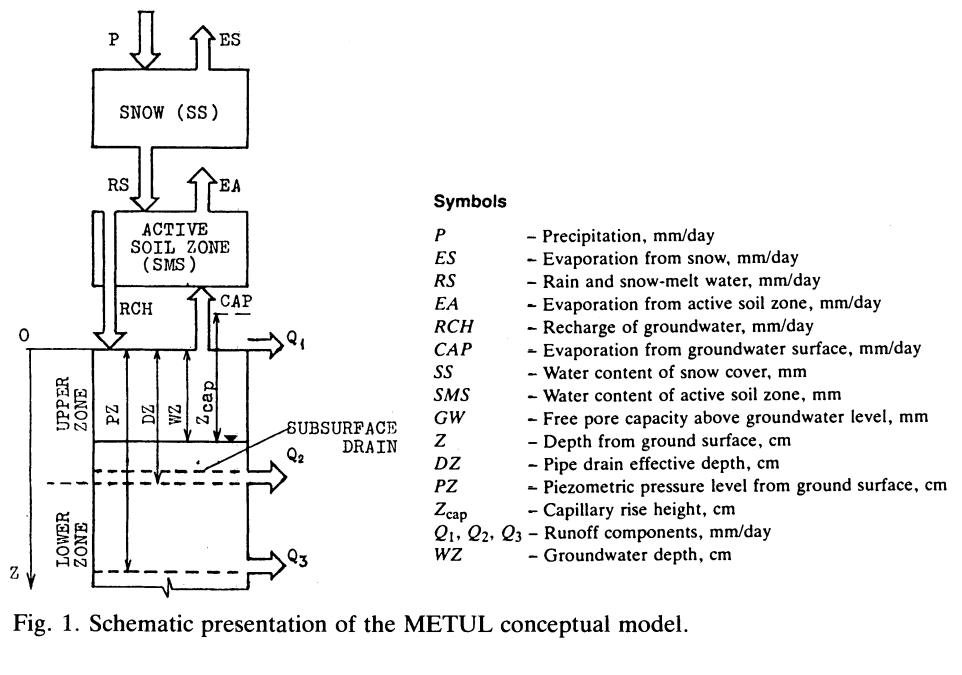

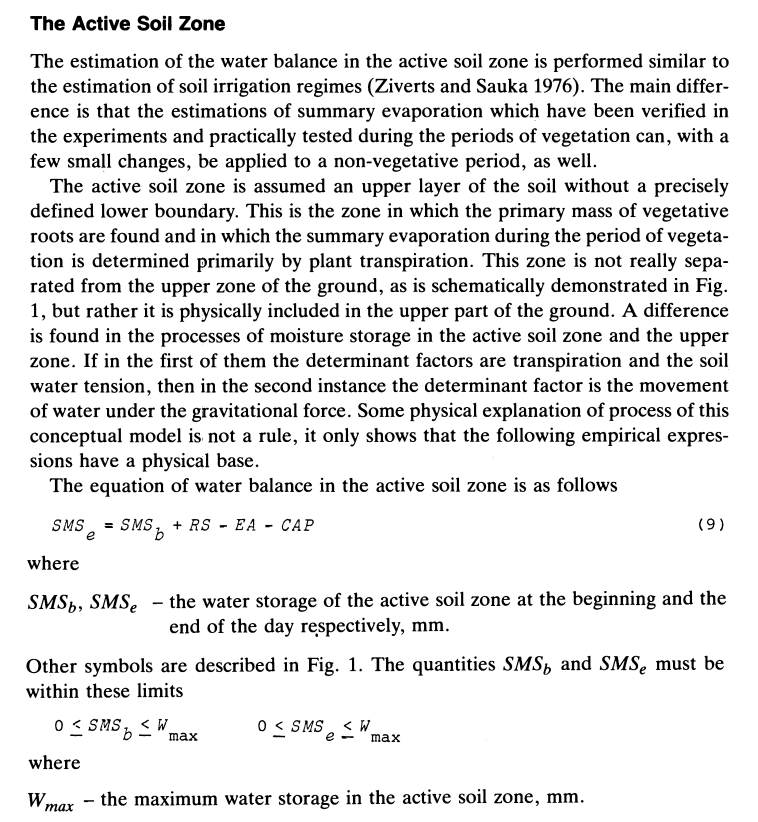



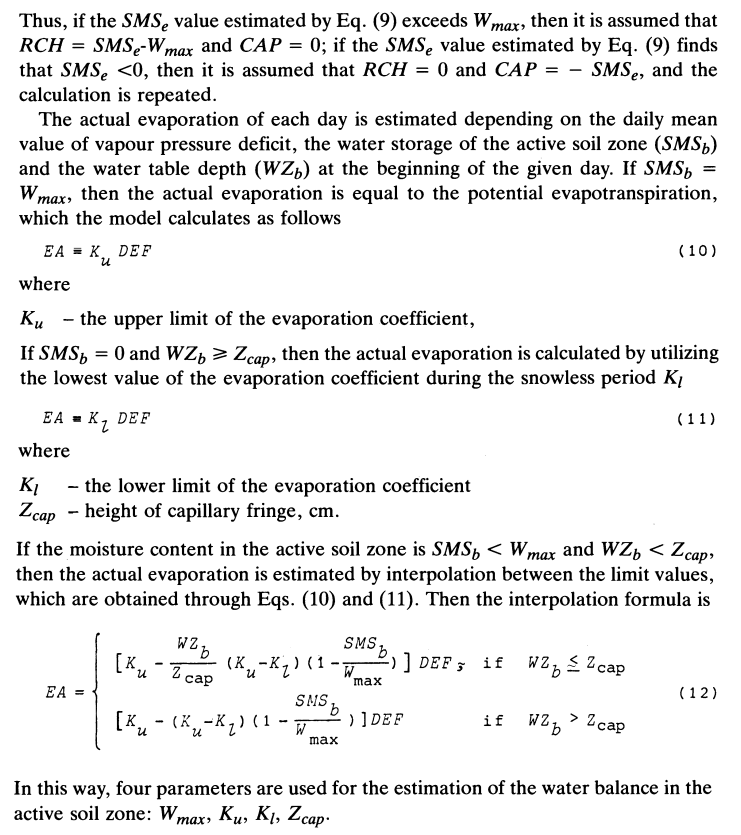